## NLTK

So far, we have split the words using manual approaches (white spaces mainly).

Is there more mature method?

Actually there is: __tokenizers__

The most basic tokenizers take care of punctuation (although we already handled with regex above), and other splitting criteria.

NLTK can be used for that.

## Sentence tokenization

Before we dive into words splitting, let's talk a little about sentence tokenization. Sometimes, the data comes in very long bult of text, a document or long paragraphs for example.

In most NLP models, such long sequences are not desirable (forgetting effect).


`sent_tokenize` can be used to tokenize into shorter sequences, mapped to sentences as we know it. This tokenization is mostly driven by punctuations like full stop.

In [1]:
from pathlib import Path
import os
DATA_PATH = Path('./dat/')
DATA_PATH.mkdir(exist_ok =True)
#if not os.path.exists('./dat/aclImdb_v1.tar.gz'):
if not os.path.exists('./dat/aclImdb'):
    !curl -O http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
    !tar -xf aclImdb_v1.tar.gz -C {DATA_PATH}

In [2]:
import numpy as np
CLASSES = ['neg' ,'pos'] #,'unsup']
PATH=Path('./dat/aclImdb/')
def get_texts(path):
  texts ,labels = [] ,[]
  for idx , label in enumerate(CLASSES):
    for fname in (path/label).glob('*.*'):
      #texts.append(fixup(fname.open('r',encoding='utf-8').read()))
      texts.append(fname.open('r', encoding='utf-8').read())
      labels.append(idx)
      #return np.array(texts), np.array(labels)
      return texts , labels

In [3]:
train_text , train_labels =get_texts(PATH/'train')
test_text  , test_labels  =get_texts(PATH/'test')

In [4]:
statement = train_text[0]
statement

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

* Download `NLTK Library`

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alhou\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
# Example
import nltk
nltk.download('punkt')

from nltk.tokenize import sent_tokenize

text = "Hello! How are you doing? I hope everything is going well."
sentences = sent_tokenize(text)

for sentence in sentences:
    print(sentence)

Hello!
How are you doing?
I hope everything is going well.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alhou\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


`NLTK (Natural Language Toolkit)` -->  is a popular Python library for working with human language data.
* `nltk.tokenize.sent_tokenize` -->  is a function provided by `NLTK` that is used for sentence tokenization.
* Sentence tokenization is the process of splitting a text into individual sentences.



In [7]:
nltk.tokenize.sent_tokenize(statement)

['Story of a man who has unnatural feelings for a pig.',
 'Starts out with a opening scene that is a terrific example of absurd comedy.',
 "A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers.",
 'Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting.',
 'Even those from the era should be turned off.',
 'The cryptic dialogue would make Shakespeare seem easy to a third grader.',
 "On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond.",
 'Future stars Sally Kirkland and Frederic Forrest can be seen briefly.']

## Words tokenization

Now, let's do as we did with regex: split on white spaces, and take care of punctuations (human-like --> humanlike)

In [8]:
from nltk.tokenize import word_tokenize
word_tokenize('human-like robots are dump, but cute')

['human-like', 'robots', 'are', 'dump', ',', 'but', 'cute']

In [9]:
word_tokenize("what's up?")

['what', "'s", 'up', '?']

We now get new results, we couldn't get with `regex`:

- human-like are kept, not transformed. Remember we had to translate - into nothing to remove punctuations

- punctuations are kept, but as _separate_ tokens. Now, we are free to decide what to do with them. They can be easily filtered out if we want. One way is using isalpha function of str in python:

In [10]:
statement = "What's up?"
words = [w for w in word_tokenize(statement) if w.isalpha()]
words

['What', 'up']

## Stop words

Not every word contribute to the semantics or meaning. Some words like 'the', 'to', 'on', 'we',...etc are not important for many tasks, specially classification tasks.

Such words are called _stop words_

* `Download Stopwords`

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alhou\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

* **Show Stopwords In English**

In [12]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Example
* **We can filter them out easily using list comprehensions:**
* `Using Stopwords`

In [13]:
statment_2 = 'The Cat Sat on the mat'
words = [w for w in statment_2.split() if w not in stop_words]
words

['The', 'Cat', 'Sat', 'mat']

__Why The is kept?__

Because it has upper case!

All stop words are lower and have no punctuation. Otherwise, it'd be very big and unmaintanable list!

So better to lower first to remove stop words:


In [14]:
statment_2 = 'The Cat Sat on the mat'
words = [w for w in statment_2.lower().split() if w not in stop_words]
words

['cat', 'sat', 'mat']

# Stemming

Another source of redundancy and highly variable/unexpected morphology are the prefixes and suffixes. For example, suppose out vocab and text are as follows:

In [15]:
v = {'the':1, 'cat':2, 'sat': 3, 'on': 4, 'mat':5}
s = 'the cats sat on the mats'
words = [v[w] for w in s.split()]

KeyError: 'cats'

**Another normalization trick is _stemming_, which has various algorithms, mainly focused on morphology. The most basic ones trims prefixes and suffixes, known in the language; English for example:**


* `The Porter stemming algorithm` -->  is a widely used algorithm for stemming English words.
* `Stemming ` --> is the process of reducing a word to its base or root form, which helps in various natural language processing tasks such as text classification, information retrieval, and language modeling.
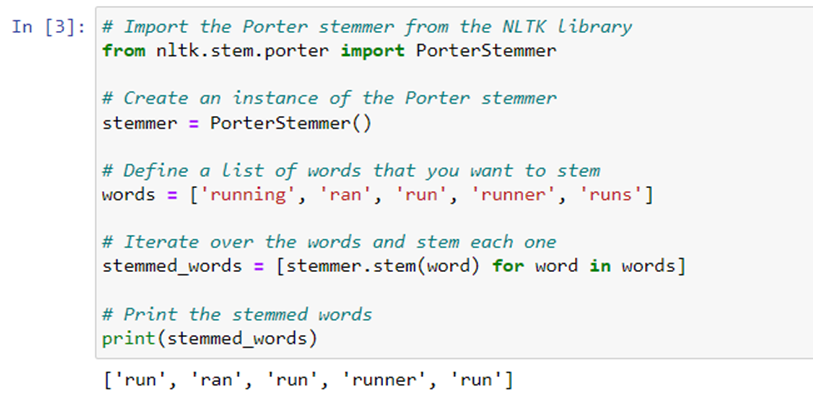

In [16]:
from nltk.stem.porter import PorterStemmer
v = {'the':1, 'cat':2, 'sat': 3, 'on': 4, 'mat':5}
porter = PorterStemmer()
statment_3 = 'the cats sat on the mats'
stemmed = [porter.stem(word) for word in statment_3.split()]
print(stemmed)
x = [v[w] for w in stemmed]
print(x)

['the', 'cat', 'sat', 'on', 'the', 'mat']
[1, 2, 3, 4, 1, 5]


**Note that: stemming might produce __meaningless words__ sometimes!**

**This is because, some prefix/suffix removal might also remove parts of the word:**

In [17]:
statment_4 = "The little girl"
stemmed = [porter.stem(word) for word in statment_4.split()]
stemmed

['the', 'littl', 'girl']

* `little is reduced to littl`

Also, notice how stemming automatically reduce to lower case.

If we are going to preprocess with stemming, we must do the same on the text we use for building our vocab!

__As a rule of thumb, perform the same preprocessing on the vocab (or its training corpus), as that on the input text__

# Lemmatization

`Unlike stemming` , `lemmatization` --> understand the root of the word in the language:

* Example --> `(am, is, are → be)`

* So not only the morphology is considered, but also the root.
* This has more importance in languages like Arabic `(requires special lemmatizers and stemmers)` .



* `The WordNetLemmatizer` -->  is a class in the Natural Language Toolkit (NLTK) library for Python.
* It is used for `lemmatizing words` , which means reducing words to their base or dictionary form (known as lemmas).
* This is helpful in various natural language processing tasks, such as text analysis, information retrieval, and machine learning.

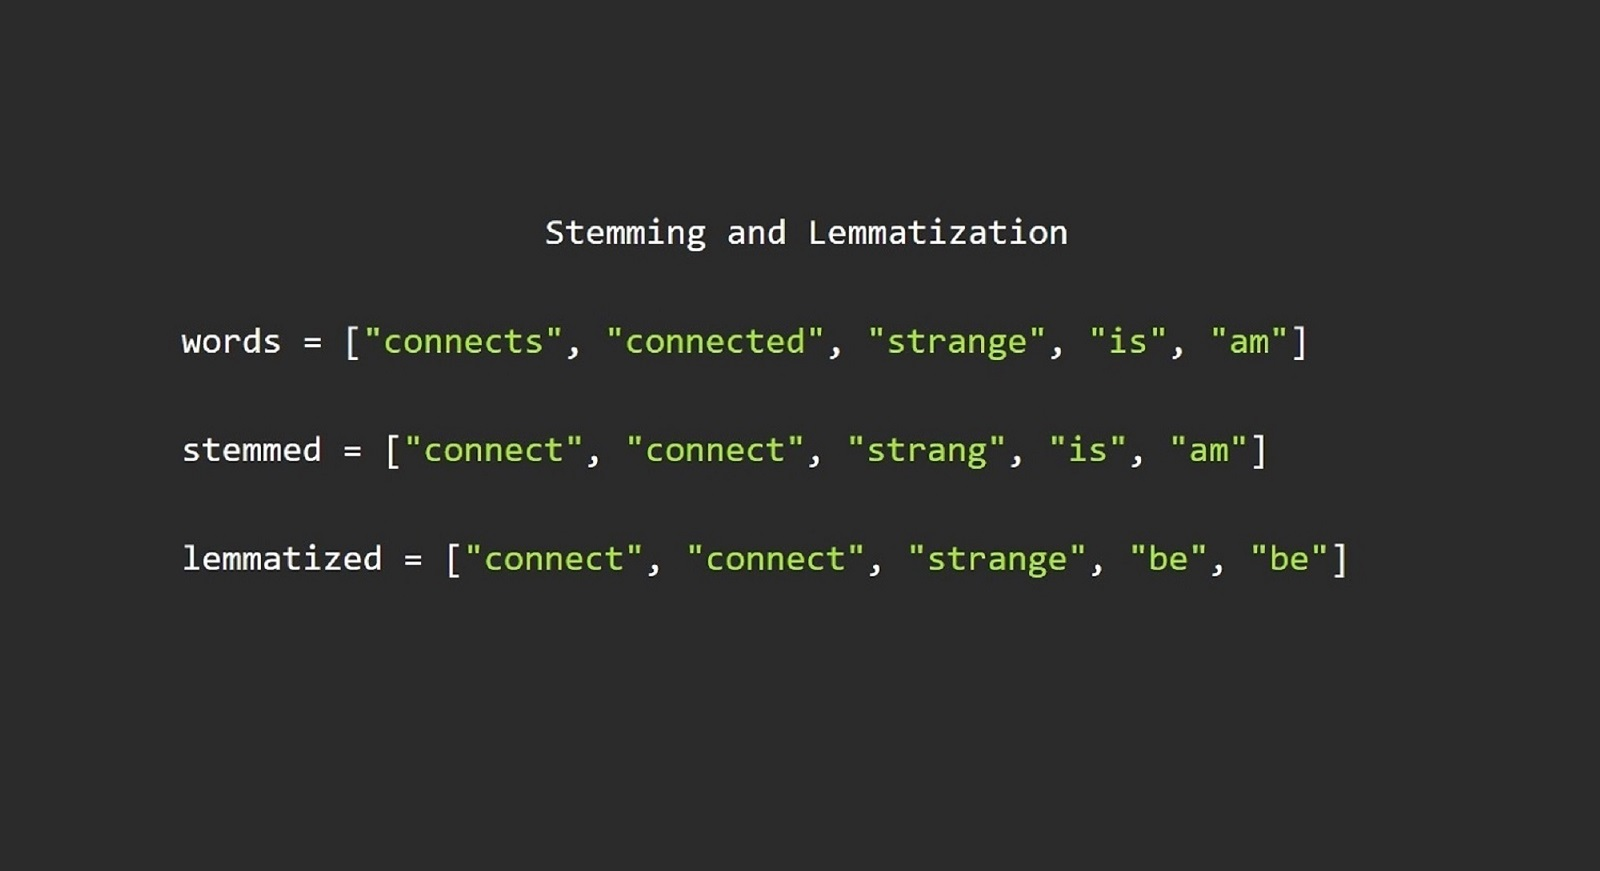

* `WordNet` --> is a lexical database and a computational linguistics resource that organizes words and their semantic relationships.
* It groups words into sets of synonyms called synsets and describes the relationships between them, such as hypernyms `(superordinate terms)`, `hyponyms (subordinate terms)`, `meronyms (part-whole relationships)`, and more.

In [18]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Alhou\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
# Example
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
s = 'The little girls rided in the cars'
[lemmatizer.lemmatize(word) for word in s.split()]

['The', 'little', 'girl', 'rided', 'in', 'the', 'car']

In [20]:
s = 'He is going on a journey fishing'
[lemmatizer.lemmatize(word) for word in s.split()]

['He', 'is', 'going', 'on', 'a', 'journey', 'fishing']

* **Problem** 
1. __But why are verbs not lemmatized?__ --> is --> be

# PoS tags

https://www.sketchengine.eu/pos-tags/

In NLP, Part-of-Speech refers to the different classes a word can belong to: noun, verb, adjective, ....etc. The different tags/classes are called tagset, and there's no common standard. They usually encode grammar + tense.

The task of PoS tagging resembles the task of semantic segmentation in CV; assign a class for every word.

In [21]:
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Alhou\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
statment_5 = "He is going on a journey fishing on ships"
tagged = nltk.pos_tag(statment_5.split())
tagged

[('He', 'PRP'),
 ('is', 'VBZ'),
 ('going', 'VBG'),
 ('on', 'IN'),
 ('a', 'DT'),
 ('journey', 'NN'),
 ('fishing', 'NN'),
 ('on', 'IN'),
 ('ships', 'NNS')]

**Lemmatizers can be assigned a pos argument to tell which PoS class to lemmatize:**

* `In Python NLTK (Natural Language Toolkit)` , `the pos='v'`  ,`and pos='n'` --> refer to the part-of-speech tags for verbs and nouns, respectively.
*  These tags are used to label words in a sentence with their corresponding grammatical category.

In [23]:
s = 'He is going on a journey fishing on ships'
print([lemmatizer.lemmatize(word , pos = 'v') for word in s.split()])
print([lemmatizer.lemmatize(word , pos = 'n') for word in s.split()])

['He', 'be', 'go', 'on', 'a', 'journey', 'fish', 'on', 'ship']
['He', 'is', 'going', 'on', 'a', 'journey', 'fishing', 'on', 'ship']


1. **The default is pos='n'**
2. **What other tags are possible?**

In [28]:
from nltk.corpus import wordnet
statment_6 = "He is going on a journey fishing on ships"
print([lemmatizer.lemmatize(word,pos=wordnet.VERB) for word in statment_6.split()])
print([lemmatizer.lemmatize(word,pos=wordnet.NOUN) for word in statment_6.split()])
print([lemmatizer.lemmatize(word,pos=wordnet.ADJ) for word in statment_6.split()])
print([lemmatizer.lemmatize(word,pos=wordnet.ADV) for word in statment_6.split()])
#print([lemmatizer.lemmatize(word,pos=[wordnet.VERB , wordnet.NOUN]) for word in statment_6.split()])

['He', 'be', 'go', 'on', 'a', 'journey', 'fish', 'on', 'ship']
['He', 'is', 'going', 'on', 'a', 'journey', 'fishing', 'on', 'ship']
['He', 'is', 'going', 'on', 'a', 'journey', 'fishing', 'on', 'ships']
['He', 'is', 'going', 'on', 'a', 'journey', 'fishing', 'on', 'ships']


# You can combine by looping:

In [30]:
pos_tag = [wordnet.VERB , wordnet.NOUN , wordnet.ADJ , wordnet.ADV]
statment_6 = "He is going on a journey fishing on ships"
words = statment_6.split()
for pos in pos_tag:
    words =[lemmatizer.lemmatize(word,pos=pos) for word in words]
words

['He', 'be', 'go', 'on', 'a', 'journey', 'fish', 'on', 'ship']

# Either stem or lemmatize

There's no need to do both.

Actually stemming might make lemmatization not working.

# Extra clean-up

We might encounter non ascii codes. In this case we need to decode Unicode characters into a normalized form, such as UTF8.

* **The code unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore') is used to remove any non-ASCII characters from a given text string.**
* __Here's a breakdown of the code__:

* `unicodedata.normalize('NFKD', text)` --> : This line normalizes the text using the `NFKD (Normalization Form KD)` method.
*  It decomposes composed characters into base characters and combining diacritical marks. This helps in handling different forms of characters.

* `.encode('ascii', 'ignore')` --> : This encodes the normalized text into ASCII encoding, ignoring any characters that cannot be represented in ASCII.
*  This step effectively removes any non-ASCII characters.

* `.decode('utf-8', 'ignore')` : Finally, the ASCII-encoded text is decoded back into UTF-8 encoding, ignoring any decoding errors.
*  This step ensures that the resulting text is in UTF-8 format.

* The purpose of this code is to convert a potentially non-ASCII text into a clean ASCII representation, removing any special or non-standard characters.

In [34]:
import unicodedata
text = 'some text'
unicodedata.normalize('NFKD',text).encode('ascii','ignore').decode('utf-8','ignore')
#unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

'some text'

For IMDB specifically, other special characters might exist due to html escape symbols and tags, like \<br />\<br />"


In [35]:
s = train_text[0]
s

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."